**MNIST Dataset을 활용한 분류 모델 실습**

In [16]:
# 파이썬 ≥3.5 필수, 이하일 경우 assert 에러
import sys
assert sys.version_info >= (3, 5)


# sklearn version 0.20 이상.
import sklearn
assert sklearn.__version__ >= "0.20"
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# 공통 모듈 임포트
import numpy as np
import os

# 실습 결과를 동일하게 하기 위해서
np.random.seed(42)

# 깔끔한 그래프 출력을 위해서
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=28)
mpl.rc('xtick', labelsize=24)
mpl.rc('ytick', labelsize=24)

# 그림을 저장할 위치 설정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

The scikit-learn version is 1.0.2.


In [2]:
#MNIST dataset 다운로드 받기 (약간의 시간 필요)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

#MNIST dataset은 딕셔너리 구조를 가지고 있음.
#데이터셋을 설명하는 'DESER' 키
#샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 'data' 키

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:

mnist


{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [6]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [10]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [14]:
y[69999]

'6'

In [8]:
28 * 28

784

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

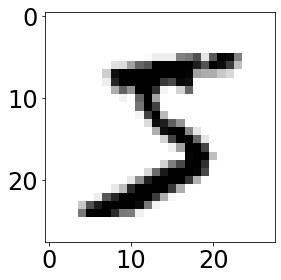

In [19]:
# 첫번째 샘플에 대한 특성 data를 28,28 픽셀로 출력하기
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
print (some_digit)
some_digit_image = some_digit.reshape(28, 28)
print (some_digit_image)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("on")

save_fig("some_digit_plot")
plt.show()

In [20]:
#첫번째 샘플의 레이블 확인하기
y[0]

'5'

In [25]:
## 레이블은 숫자가 아닌 문자열
## 머신러닝 알고리즘은 숫자를 기대하므로 y를 정수로 변환
print (type(y[0]))
y = y.astype(np.uint8)

<class 'numpy.uint8'>


In [27]:
# 샘플의 특성 data를 28,28 픽셀로 출력하는 함수 만들기.

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [31]:
# 숫자 그림을 위한 추가 함수

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("on")

그림 저장: more_digits_plot


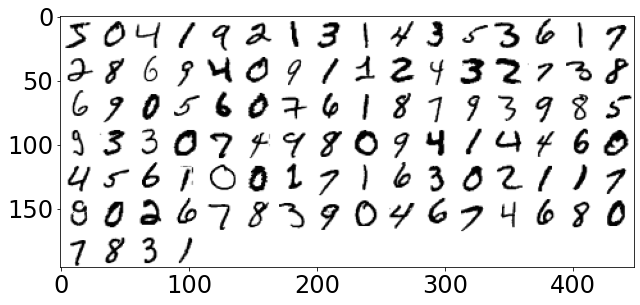

In [33]:
## 10X10으로 그리려면 images_per_row를 10으로 변경.

plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=16)
save_fig("more_digits_plot")
plt.show()

In [34]:
#첫번째, 두번째, 세번째 샘플의 레이블 확인하기.
y[0], y[1], y[2]

(5, 0, 4)

In [35]:
#training set, test set 지정하기. 60,000개, 10,000개

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print (y_train[0])
print (y_train[11])

5
5


# Binary Classification 실습

In [36]:
# 5는 True이고, 다른 숫자는 모두 False

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#print (X_train)
#print (X_test.shape)
#print (y_train)
#print (y_test)

print (y_train_5[0],y_train_5[11], y_train_5[12])
print (y_test_5)

True True False
[False False False ... False  True False]


In [37]:
# SGD Classifier 적용 분류 모델 만들어 보기.
# 5이면 true로 , 5가 아니면 false로 분류하는 Binary Classification.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=17)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=17)

In [38]:
sgd_clf.predict([some_digit])

## some_digit = X[0]

array([ True])

In [39]:
## cross_val_score : 단순교차검증
## 3-폴드 교차 검증 수행

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96675, 0.9618 , 0.94425])

In [43]:
## StratifiedKFold : 계층별 k-겹 교차 검증 (클래스별 비율이 유지되도록 폴드를 만듦)
## k-fold 에서 데이터(레이블 or 클래스)가 한 곳으로 몰리는 것을 방지

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

## 위에서 만들 모델, "sgd_clf.fit(X_train, y_train_5)"을 "clone_clf"라는 이름으로 담기.

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    print (train_index)
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    print (test_index)

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

[    1     3     4 ... 59994 59996 59998]
[    0     2     6 ... 59995 59997 59999]
0.9681
[    0     2     3 ... 59997 59998 59999]
[    1    10    11 ... 59988 59989 59991]
0.9651
[    0     1     2 ... 59995 59997 59999]
[    3     4     5 ... 59994 59996 59998]
0.9653


In [44]:
## 모든 이미지를 "5아님" 클래스로 분류하는 dummy classifier 생성해보기.

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [46]:
from sklearn.model_selection import cross_val_score

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

## 10개중에 1개만 "5"이므로 모두 5가 아니라고 분류하는 모델을 만들면
## 정확도가 90% 이상 나오게 됨.
## Accuracy가 높다고 해서 무조건 좋은 모델이라고 오판해서는 안됨!!

array([0.91125, 0.90855, 0.90915])

In [48]:
# 모두 False로 예측 하는지 체크!

from sklearn.model_selection import cross_val_predict
y_never_5_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)
print (y_never_5_pred)


[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [49]:
## 다시 sgd_clf 모델(In 68에서 생성)을 활용하여 예측값에 대한 array (y_train_pred)생성.

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print (y_train_pred)

[ True False False ...  True False False]


In [52]:
## 오차 행렬 확인하기

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53936,   643],
       [ 1901,  3520]])

In [51]:
## 예측값의 자리에 정답을 놓고 오차 행렬을 확인해보면...
## 완벽한 분류기의 결과를 보임.

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

In [53]:
## 정밀도 확인 (sklearn 함수 제공)

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8455440787893346

In [54]:
## 정밀도를 CM으로부터 직접 계산

cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8455440787893346

In [55]:
## 재현율 확인 (sklearn 함수 제공)

recall_score(y_train_5, y_train_pred)

0.6493266924921601

In [56]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6493266924921601

In [57]:
## F1 score 확인 (sklearn 함수 제공)

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7345575959933222

In [58]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7345575959933222

## 정밀도/재현율 트레이드오프

In [59]:
## decision_function()메서드를 호출하여 각 샘플의 점수를 확인해보자.
## 이 점수가 임계값(threshold)보다 크면 양성(True)으로 분류함.

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1067.64798936])

In [60]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)


In [61]:
y_some_digit_pred

array([ True])

In [62]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

## 이미지가 실제로 숫자 5이고 임계값이 0일때는 분류기가 이를 감지했지만, 임계값을 높이면 이를 놓치게 됨. 
## 따라서 True Positive는 줄어들고 False Negative은 늘어나므로 재현율은 감소하게 됨. 
## Threshold가 양의 방향으로 커지면 재현율은 감소하게 됨.

array([False])

In [63]:
## decision_function()메서드를 사용하여 y_scores array 생성.

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([  2402.52975074, -13366.16421546, -25713.60673974, ...,
         4283.08132713, -13004.21253155, -21784.1670382 ])

In [68]:
## precision_recall_curve 함수를 사용하면 threshold 값에 따른 precision, recall 값들을 가져옴.

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# 각 값들을 직접 확인해보자.
#print (precision_recall_curve(y_train_5, y_scores))
#print (precisions)
#print (recalls)
print (thresholds)

[-83626.86574344 -83554.04875111 -83537.07572612 ...  29576.47908464
  30579.17852112  31244.48269202]


그림 저장: precision_recall_vs_threshold_plot


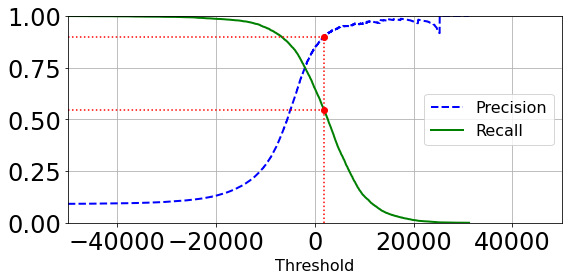

In [69]:
##threshold에 따른 정밀도/재현율 그리기 함수 만들기.

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


## 그리기 설정.
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                         
save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

In [70]:
##(y_train_pred == (y_scores > 0)).all()

[0.09044799 0.09043281 0.09043432 ... 1.         1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
그림 저장: precision_vs_recall_plot


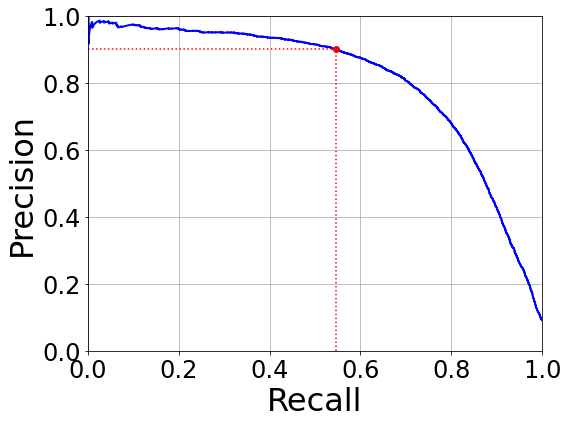

In [72]:
## 정밀도/재현율 trade off 관계 그림 그려보기.

print (precisions)
print (recalls)


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=32)
    plt.ylabel("Precision", fontsize=32)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [73]:
## 정밀도 90% 달성을 목표로 설정.

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


In [74]:
threshold_90_precision

1854.5025990559502

In [75]:
## y_scores가 1854보다 크거나 같으면 True, 작으면 false 라고 하고,
## 이 결과를 y_train_pred_90에 담기.

y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([ True, False, False, ...,  True, False, False])

In [76]:
## 실제 정확도를 확인해보기

precision_score(y_train_5, y_train_pred_90)

0.9001214329083181

In [77]:
## 재현율도 확인해보기

recall_score(y_train_5, y_train_pred_90)

0.5469470577384247

In [78]:
## ROC곡선 그려보기
## roc_curve 함수를 통해서 threshold의 변화에 따른 fpr, tpr 값의 변화를 가져오기.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

0.0060279594715916375
0.5469470577384247
그림 저장: roc_curve_plot


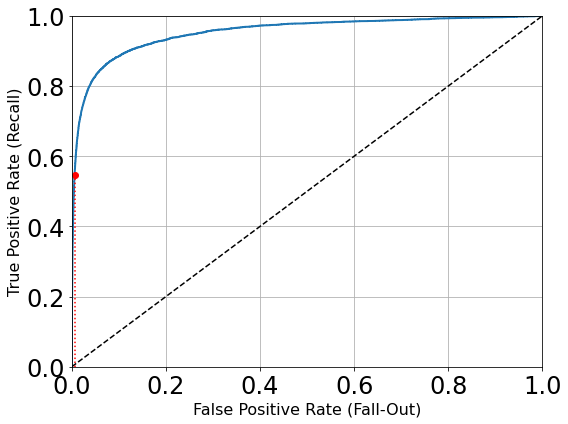

In [79]:
## ROC곡선 그리기 함수 만들기

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
print (fpr_90)
print (recall_90_precision)
#plt.plot([0.2, 0.7], [0.3, 0.5], "r:")   # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [80]:
## roc_auc_score 함수를 이용하여 분류기 성능 체크

from sklearn.metrics import roc_auc_score

print (y_train_5)
print (y_scores)

roc_auc_score(y_train_5, y_scores)



[ True False False ...  True False False]
[  2402.52975074 -13366.16421546 -25713.60673974 ...   4283.08132713
 -13004.21253155 -21784.1670382 ]


0.953268587325405

In [81]:
## Random Forest 분류기로 훈련 시키기.

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [82]:
## predict_proba 메서드를 활용하여 양성 클래스일 확률을 점수로 사용.


y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률

print (y_train_5)
print (y_scores_forest)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

[ True False False ...  True False False]
[0.89 0.01 0.04 ... 0.98 0.08 0.06]


0.9584947426674045
그림 저장: roc_curve_comparison_plot


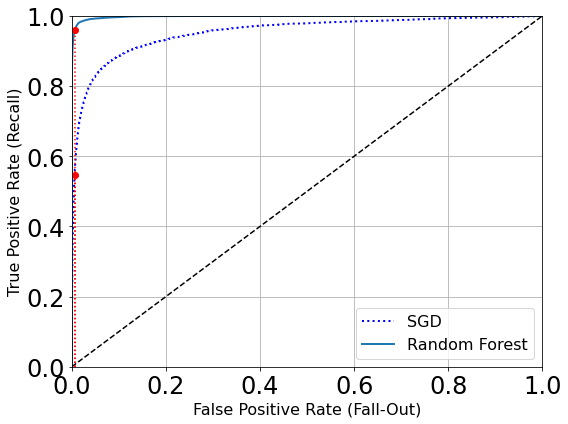

In [84]:
## SGD와 random forest 알고리즘에 따른 ROC 커브 비교.

recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

print (recall_for_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [85]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [86]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [87]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591